# Analisar:
- COTAS BRASIL
- COTAS IES PÚBLICAS DE PERNAMBUCO
- COTAS X RAÇA
- QUANTOS COTISTAS EM PUBLICAS E PARTICULARES
- COTISTAS E NAO COTISTAS X FINANCIAMENTO ESTUDANTIL
- COTISTAS X ESCOLA ENSINO MEDIO

In [1]:
import pandas as pd
import random
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns


dataframe = pd.read_csv(
    'SUP_ALUNO_2019.csv',
    encoding = "ISO-8859-1", 
    usecols=['CO_IES', 'IN_RESERVA_VAGAS', 'TP_SITUACAO', 'TP_SEXO', 'TP_COR_RACA', 
             'TP_CATEGORIA_ADMINISTRATIVA', 'IN_FINANCIAMENTO_ESTUDANTIL', 
            'TP_ESCOLA_CONCLUSAO_ENS_MEDIO'],
    sep='|'
    )

dataframe.head()

,CO_IES,TP_CATEGORIA_ADMINISTRATIVA,TP_COR_RACA,TP_SEXO,TP_SITUACAO,IN_RESERVA_VAGAS,IN_FINANCIAMENTO_ESTUDANTIL,TP_ESCOLA_CONCLUSAO_ENS_MEDIO
0,1,1,2,1,2,0,NaN,1
1,1,1,3,2,3,1,NaN,1
2,1,1,3,2,2,1,NaN,1
3,1,1,2,1,4,1,NaN,1
4,1,1,3,2,6,1,NaN,1


---
## Gráfico para a visualização da porcentagem de alunos que participaram de programa de reserva de vagas (cotas) em todas as IES brasileiras.

##### Os programas de reserva de vagas incluem:
- Reserva de vagas de cunho étnico
- Reserva de vagas para pessoas com deficiência
- Reserva de vagas para pessoas oriundas de escolas públicas
- Reserva de vagas para pessoas de baixa renda
- Outras situações

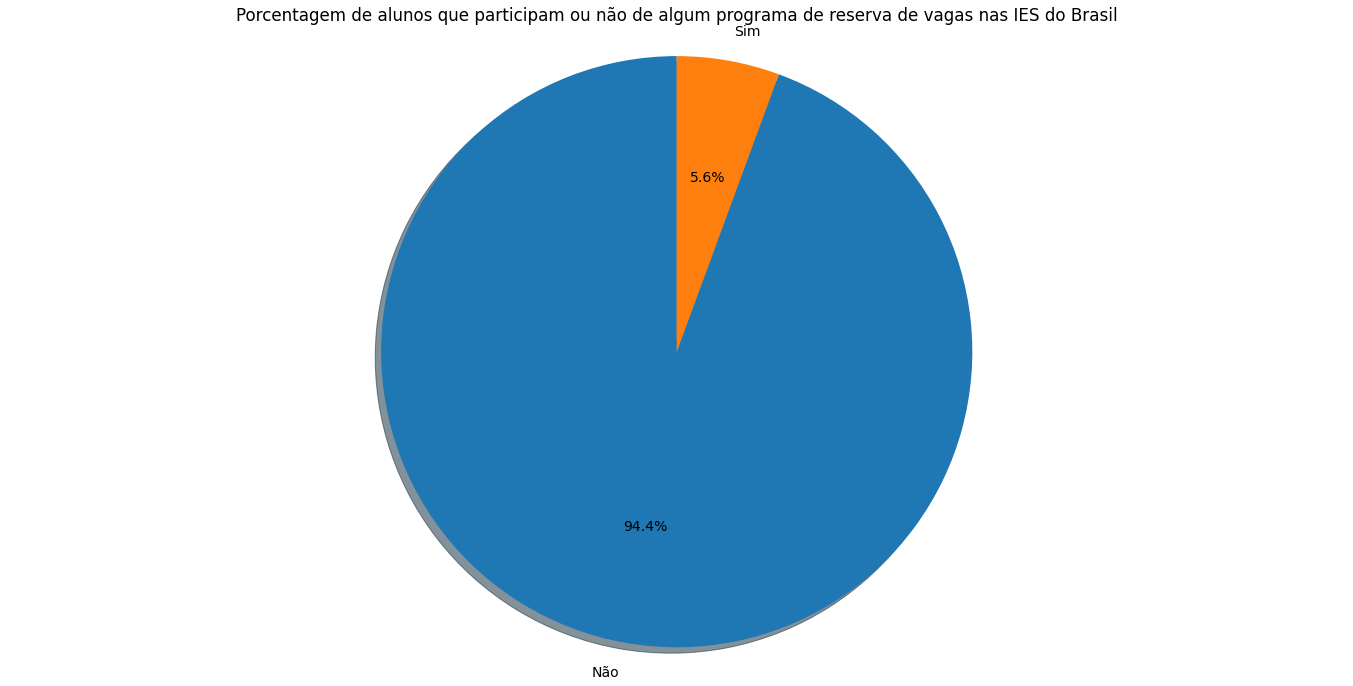

Não participaram: 94.4%
Participaram: 5.6%


In [2]:
numeroEstudantesBrasil = dataframe.shape[0]

nao = dataframe.loc[dataframe['IN_RESERVA_VAGAS'] == 0].count()[0]
sim = dataframe.loc[dataframe['IN_RESERVA_VAGAS'] == 1].count()[0]

labels = ['Não', 'Sim']

sizes=[nao*100/numeroEstudantesBrasil, 
       sim*100/numeroEstudantesBrasil]

fig1, ax1 = plt.subplots(figsize=(24, 12))

plt.rcParams.update({'font.size': 14})

ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)

ax1.axis('equal')

ax1.set_title(f"Porcentagem de alunos que participam ou não de algum programa de reserva de vagas nas IES do Brasil")

plt.show()

print(f'Não participaram: {nao*100/numeroEstudantesBrasil:.1f}%'
      f'\nParticiparam: {sim*100/numeroEstudantesBrasil:.1f}%')

## Gráfico para a visualização da porcentagem de alunos que participaram de programa de reserva de vagas (cotas) nas IES públicas.

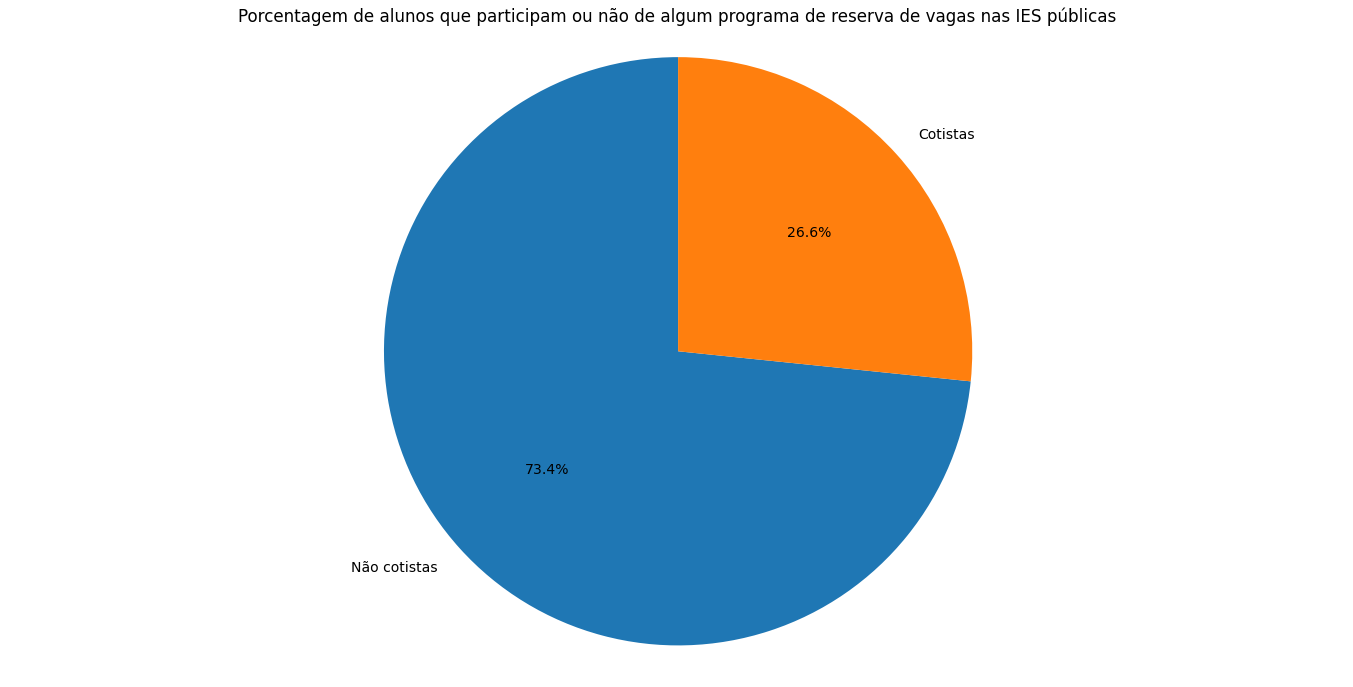

In [19]:
alunosFed = dataframe.loc[dataframe['TP_CATEGORIA_ADMINISTRATIVA'] == 1]
alunosEst = dataframe.loc[dataframe['TP_CATEGORIA_ADMINISTRATIVA'] == 2]
alunosMun = dataframe.loc[dataframe['TP_CATEGORIA_ADMINISTRATIVA'] == 3]

naoCotistasFed = alunosFed.loc[alunosFed['IN_RESERVA_VAGAS'] == 0].count()[0]
cotistasFed = alunosFed.loc[alunosFed['IN_RESERVA_VAGAS'] == 1].count()[0]
naoCotistasEst = alunosEst.loc[alunosEst['IN_RESERVA_VAGAS'] == 0].count()[0]
cotistasEst = alunosEst.loc[alunosEst['IN_RESERVA_VAGAS'] == 1].count()[0]
naoCotistasMun = alunosMun.loc[alunosMun['IN_RESERVA_VAGAS'] == 0].count()[0]
cotistasMun = alunosMun.loc[alunosMun['IN_RESERVA_VAGAS'] == 1].count()[0]

cotistasTotal = cotistasFed + cotistasEst + cotistasMun
naoCotistasTotal = naoCotistasFed + naoCotistasEst + naoCotistasMun

labels = ['Não cotistas', 'Cotistas']

values = [naoCotistasTotal, cotistasTotal]

fig1, ax1 = plt.subplots(figsize=(24, 12))

plt.rcParams.update({'font.size': 14})

ax1.pie(values, labels=labels, autopct='%1.1f%%', shadow=False, startangle=90)

ax1.axis('equal')

ax1.set_title(f"Porcentagem de alunos que participam ou não de algum programa de reserva de vagas nas IES públicas")

plt.show()

## Gráfico para a visualização da porcentagem de alunos que participaram de programa de reserva de vagas (cotas) nas IES privadas.

---
## Gráfico para a visualização da raça/cor declarada por alunos que participam ou não de algum programa de reserva de vagas nas IES do Brasil

#### Os programas de reserva de vagas incluem:
- Reserva de vagas de cunho étnico
- Reserva de vagas para pessoas com deficiência
- Reserva de vagas para pessoas oriundas de escolas públicas
- Reserva de vagas para pessoas de baixa renda
- Outras situações

### Cotistas

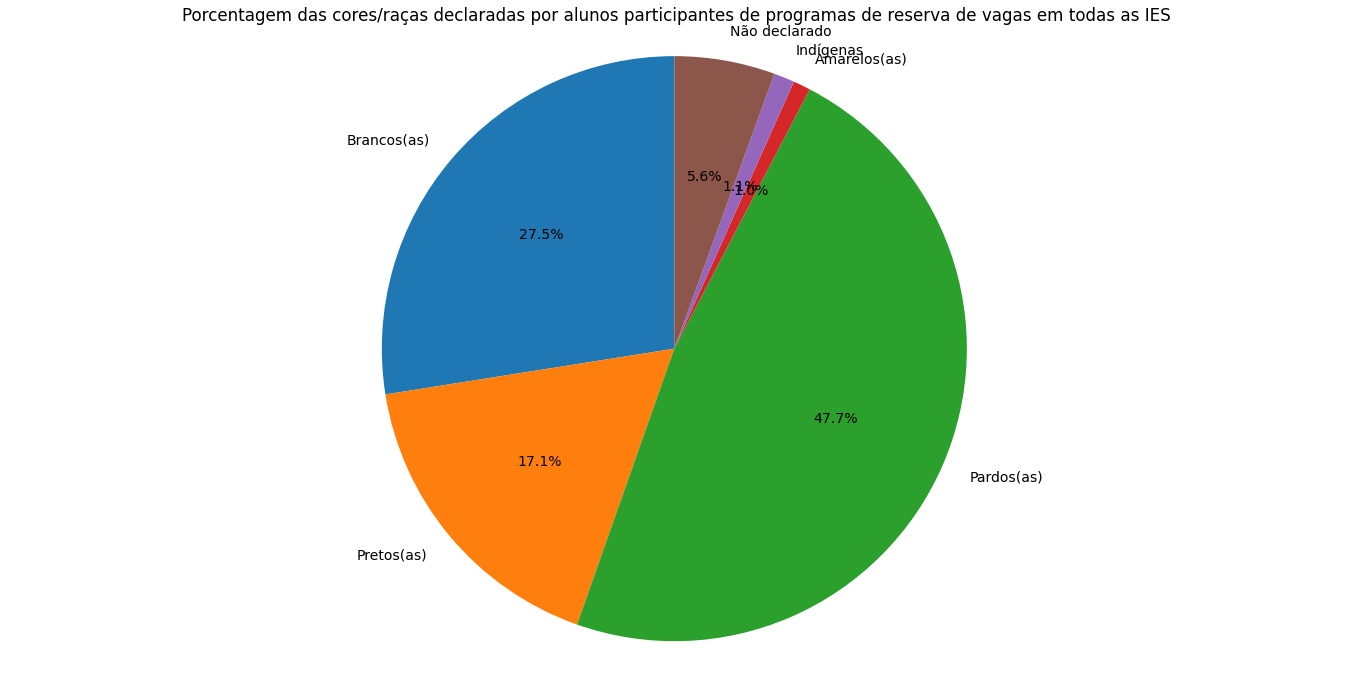

In [7]:
cotistas = dataframe.loc[dataframe['IN_RESERVA_VAGAS'] == 1]  # lista cotistas

# declaração de raça dos cotistas
naoDeclarouCot = cotistas.loc[cotistas['TP_COR_RACA'] == 0].count()[0]
brancosCot = cotistas.loc[cotistas['TP_COR_RACA'] == 1].count()[0]
pretosCot = cotistas.loc[cotistas['TP_COR_RACA'] == 2].count()[0]
pardosCot = cotistas.loc[cotistas['TP_COR_RACA'] == 3].count()[0]
amarelosCot = cotistas.loc[cotistas['TP_COR_RACA'] == 4].count()[0]
indigenasCot = cotistas.loc[cotistas['TP_COR_RACA'] == 5].count()[0]
naoDispoeCot = cotistas.loc[cotistas['TP_COR_RACA'] == 9].count()[0]
naoInformadoCot = naoDeclarouCot + naoDispoeCot

labels = ['Brancos(as)', 'Pretos(as)', 'Pardos(as)', 'Amarelos(as)', 'Indígenas', 'Não declarado']

values = [brancosCot,
         pretosCot,
         pardosCot,
         amarelosCot,
         indigenasCot,
         naoInformadoCot]

fig1, ax1 = plt.subplots(figsize=(24, 12))

plt.rcParams.update({'font.size': 14})

ax1.pie(values, labels=labels, autopct='%1.1f%%', shadow=False, startangle=90)

ax1.axis('equal')

ax1.set_title(f"Porcentagem das cores/raças declaradas por alunos participantes de programas de reserva "
              f"de vagas em todas as IES")

plt.show()

In [15]:
cotistas

,CO_IES,TP_CATEGORIA_ADMINISTRATIVA,TP_COR_RACA,TP_SEXO,TP_SITUACAO,IN_RESERVA_VAGAS,IN_FINANCIAMENTO_ESTUDANTIL,TP_ESCOLA_CONCLUSAO_ENS_MEDIO
1,1,1,3,2,3,1,NaN,1
2,1,1,3,2,2,1,NaN,1
3,1,1,2,1,4,1,NaN,1
4,1,1,3,2,6,1,NaN,1
5,1,1,2,1,6,1,NaN,1
...,...,...,...,...,...,...,...,...
12350352,23713,2,2,2,2,1,NaN,1
12350359,23713,2,0,1,2,1,NaN,1
12350378,23713,2,0,1,2,1,NaN,1
12350384,23713,2,2,1,4,1,NaN,1


### Não cotistas

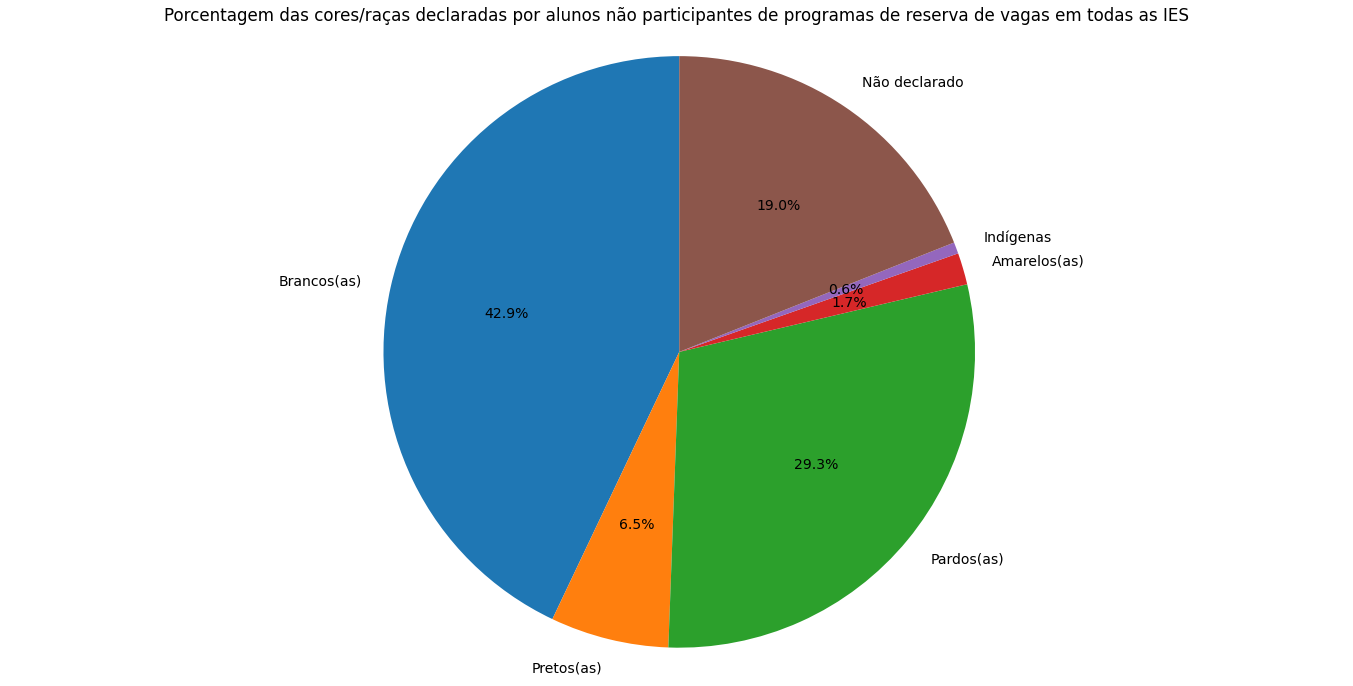

In [9]:
naoCotistas = dataframe.loc[dataframe['IN_RESERVA_VAGAS'] == 0]  # lista não cotistas

# declaração de raça dos nao cotistas
naoDeclarouNCot = naoCotistas.loc[naoCotistas['TP_COR_RACA'] == 0].count()[0]
brancosNCot = naoCotistas.loc[naoCotistas['TP_COR_RACA'] == 1].count()[0]
pretosNCot = naoCotistas.loc[naoCotistas['TP_COR_RACA'] == 2].count()[0]
pardosNCot = naoCotistas.loc[naoCotistas['TP_COR_RACA'] == 3].count()[0]
amarelosNCot = naoCotistas.loc[naoCotistas['TP_COR_RACA'] == 4].count()[0]
indigenasNCot = naoCotistas.loc[naoCotistas['TP_COR_RACA'] == 5].count()[0]
naoDispoeNCot = naoCotistas.loc[naoCotistas['TP_COR_RACA'] == 9].count()[0]
naoInformadoNCot = naoDeclarouNCot + naoDispoeNCot

labels = ['Brancos(as)', 'Pretos(as)', 'Pardos(as)', 'Amarelos(as)', 'Indígenas', 'Não declarado']

values = [brancosNCot,
         pretosNCot,
         pardosNCot,
         amarelosNCot,
         indigenasNCot,
         naoInformadoNCot]

fig1, ax1 = plt.subplots(figsize=(24, 12))

plt.rcParams.update({'font.size': 14})

ax1.pie(values, labels=labels, autopct='%1.1f%%', shadow=False, startangle=90)

ax1.axis('equal')

ax1.set_title(f"Porcentagem das cores/raças declaradas por alunos não participantes de programas de reserva "
              f"de vagas em todas as IES")

plt.show()

---
### Gráfico para a visualização da porcentagem de alunos de uma IES que participaram de programa de reserva de vagas (cotas).

In [10]:
listaIES = {580 : 'UFPE', 
            409 : 'UPE', 
            587 : 'UFRPE', 
           1809 : 'IFPE',
           3984 : 'UNIVASF'}

#### Código da Instituição de Ensino Superior:

In [11]:
codigoIES = 587
nomeIES = listaIES[codigoIES]

In [12]:
numeroEstudantesIES = dataframe.loc[dataframe['CO_IES'] == codigoIES].count()[0]
print(f"Quantidade de alunos da {nomeIES} avaliados pelo Censo: {numeroEstudantesIES} estudantes.")

Quantidade de alunos da UFRPE avaliados pelo Censo: 18643 estudantes.


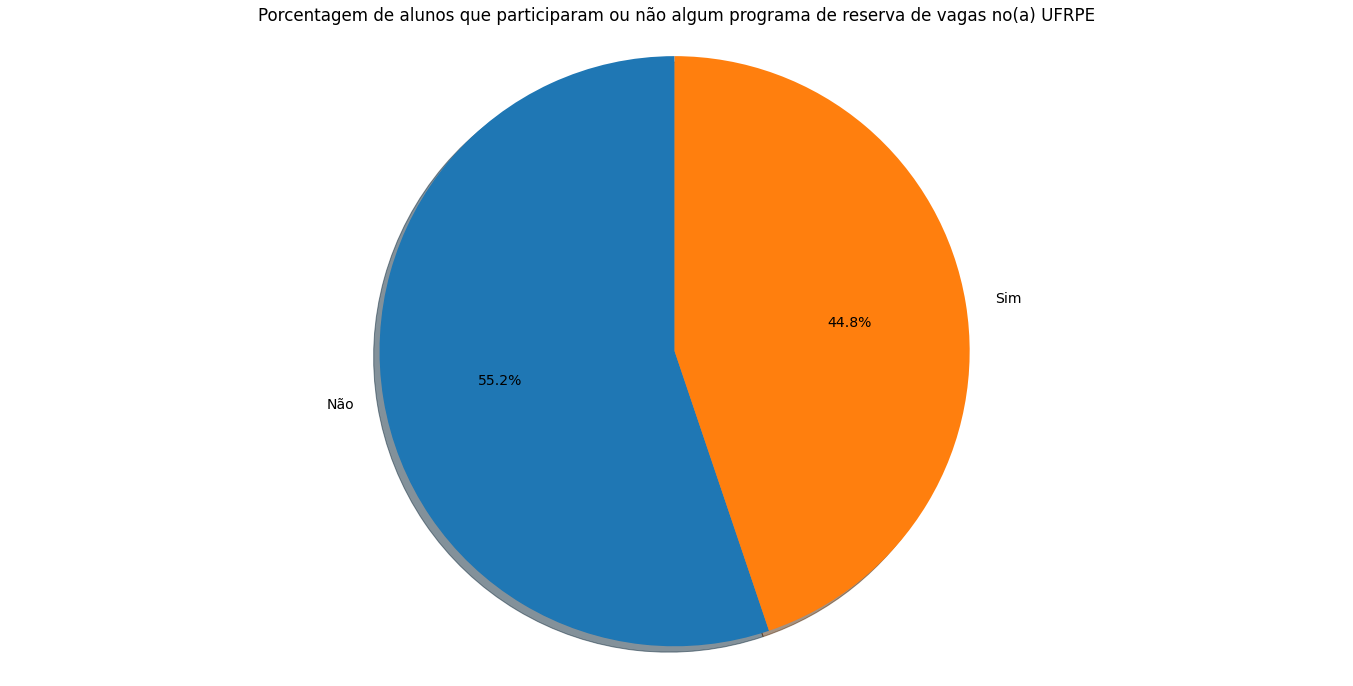

Não participaram: 55.2%
Participaram: 44.8%


In [13]:
estudantes = dataframe.loc[dataframe['CO_IES'] == codigoIES]

nao = estudantes.loc[estudantes['IN_RESERVA_VAGAS'] == 0].count()[0]
sim = estudantes.loc[estudantes['IN_RESERVA_VAGAS'] == 1].count()[0]

labels = ['Não', 'Sim']

sizes=[nao*100/numeroEstudantesIES, 
       sim*100/numeroEstudantesIES]

fig1, ax1 = plt.subplots(figsize=(24, 12))

plt.rcParams.update({'font.size': 14})

ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)

ax1.axis('equal')

ax1.set_title(f"Porcentagem de alunos que participaram ou não algum programa de reserva de vagas no(a) {nomeIES}")

plt.show()

print(f'Não participaram: {nao*100/numeroEstudantesIES:.1f}%'
      f'\nParticiparam: {sim*100/numeroEstudantesIES:.1f}%') 
